---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [2]:
#EDA에 사용할 라이브러리를 import 하세요
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [4]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
sbike=pd.read_csv('sbikedata.csv')
sbike

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [5]:
sbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [130]:
sbike['date']=pd.to_datetime(sbike['date'])
sbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5670 non-null   datetime64[ns]
 1   hour           5670 non-null   int64         
 2   PM10           5670 non-null   float64       
 3   PM2.5          5670 non-null   float64       
 4   ozone          5670 non-null   float64       
 5   temperature    5670 non-null   float64       
 6   precipitation  5670 non-null   int64         
 7   windspeed      5670 non-null   float64       
 8   humidity       5670 non-null   int64         
 9   visibility     5670 non-null   int64         
 10  count          5670 non-null   int64         
 11  snow           5670 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(5)
memory usage: 509.5 KB


In [134]:
sbike['weekday'] = sbike['date'].dt.weekday

weekday_list = ['월', '화', '수', '목','금','토','일']

sbike['요일'] = sbike.apply(lambda x:weekday_list[x['weekday']], axis=1)

sbike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,snow,weekday,요일
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,0,3,목
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,0,3,목
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,0,3,목
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,0,3,목
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,0,3,목


In [138]:
sbike['month']=sbike['date'].dt.strftime('%m')
sbike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,snow,weekday,요일,month
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,0,3,목,04
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,0,3,목,04
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,0,3,목,04
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,0,3,목,04
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,0,3,목,04


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

  
- 가설 2 : ㅇ 귀무가설 : 온도와 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설 : 온도와 따릉이 대여량 간에는 연관성이 없다.  
  
- 가설 3 :  ㅇ 귀무가설: 가시거리와 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설 : 온도와 따릉이 대여량 간에는 연관성이 있다.  
  
- 가설 4 : ㅇ 귀무가설: 풍속에 따른 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설: 풍속에 따른 따릉이 대여량 간에는 연관성이 있다.  
  
- 가설 5 : ㅇ 귀무가설: 습도에 따른 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설: 습도에 따른 따릉이 대여량 간에는 연관성이 있다.  
  
- 가설 6 : ㅇ 귀무가설: 초미세먼지 수치에 따른 따릉이간에는 연관성이 없다.

    ㅇ 대립가설: 초미세먼지 수치에 따른 따릉이간에는 연관성이 있다.  

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?  
몇 시인지

2. 변수가 수치형인지 범주형인지


In [6]:
#변수의 자료형을 확인해보세요.
sbike['hour'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [8]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['hour'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [9]:
#변수의 기초 통계량을 확인해보세요.
sbike['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='hour', ylabel='Count'>

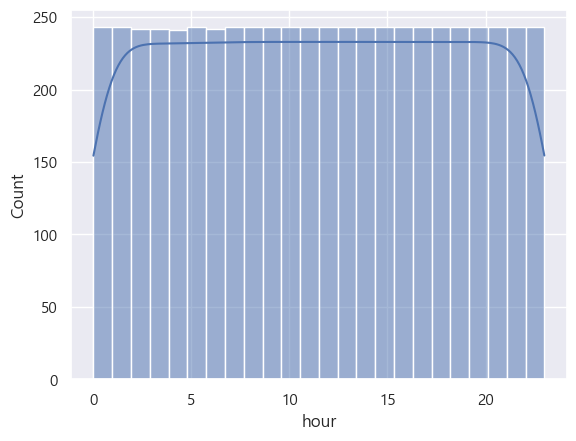

In [16]:
#변수의 분포를 확인해보세요.
sns.histplot(sbike['hour'],bins=24, kde=True)

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
hour는 대여 시작한 그 날짜의 시간이고 시간대별로 거의 균등하게 있다.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [21]:
#변수의 자료형을 확인해보세요.
sbike['temperature'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [22]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['temperature'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [23]:
#변수의 기초 통계량을 확인해보세요
sbike['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='temperature'>

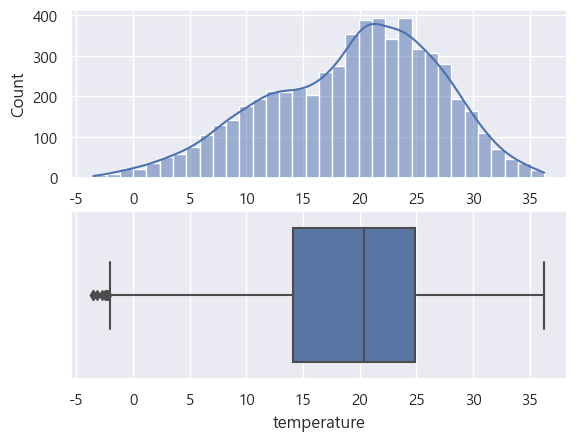

In [26]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['temperature'], kde=True)

plt.subplot(2,1,2)
sns.boxplot(x=sbike['temperature'])

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
온도는 연속형 변수이고 20 ~ 25도 대가 가장 많고 -4 ~ -2도대는 수치가 적다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [27]:
#변수의 자료형을 확인해보세요.
sbike['precipitation'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [28]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['precipitation'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [29]:
#변수의 기초 통계량을 확인해보세요
sbike['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

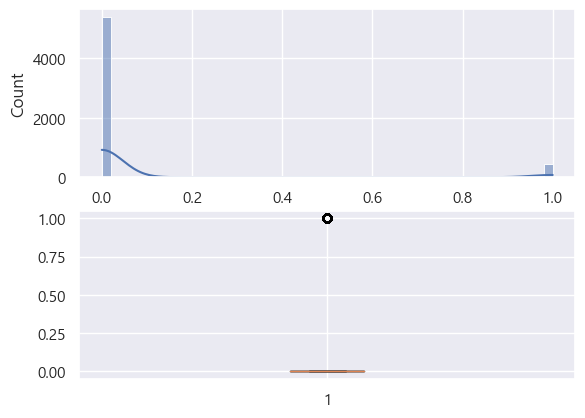

In [34]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['precipitation'], bins=50, kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['precipitation'])

plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
강우여부는 범주형 자료이고 0에 가장 많이 분포해 있다.  

7. 추가 분석사항 도출

In [39]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
sbike.loc[sbike['precipitation']>0.8]['precipitation'].count() # 0.076비율

440

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [41]:
#변수의 자료형을 확인해보세요.
sbike['windspeed'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [42]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['windspeed'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [43]:
#변수의 기초 통계량을 확인해보세요
sbike['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

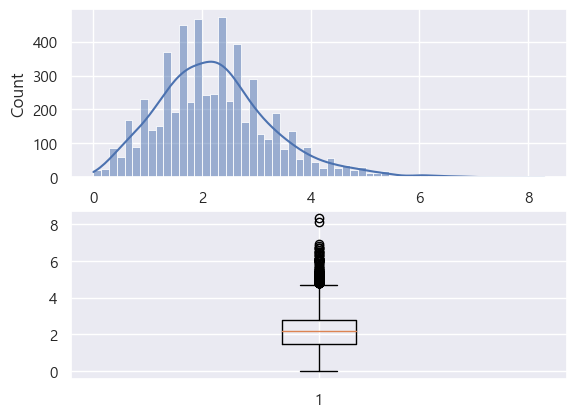

In [45]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['windspeed'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['windspeed'])

plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
풍속은 수치형 데이터이고, 2에서 가장 많이 분포하나 도중도중 튀는 데이터가 많았다.  
7이상의 데이터는 이상치이고 비율 판단이 필요하다.

7. 추가 분석사항 도출

In [48]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
sbike.loc[sbike['windspeed']>=7]['windspeed'].count() #0.0003 비율 이상치가 맞다.

2

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [49]:
#변수의 자료형을 확인해보세요.
sbike['humidity'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [50]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
sbike['humidity'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [51]:
#변수의 기초 통계량을 확인해보세요
sbike['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

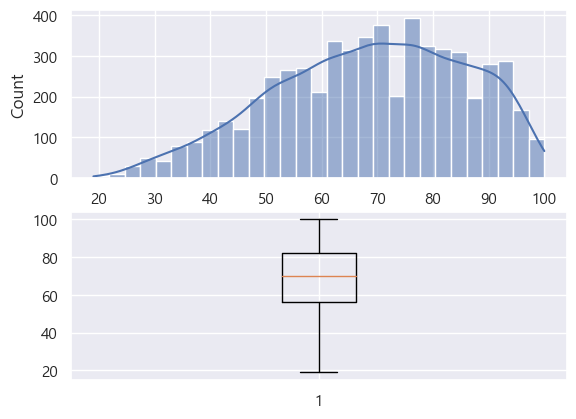

In [52]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['humidity'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['humidity'])

plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
습도는 수치형 변수이며, 70퍼대가 가장 많았다.
골고루 분산되어 있으며 이상치가 없다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [53]:
#변수의 자료형을 확인해보세요.
sbike['visibility'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [55]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['visibility'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [56]:
#변수의 기초 통계량을 확인해보세요
sbike['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

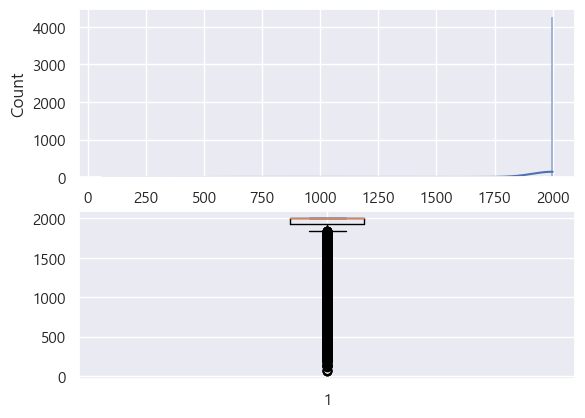

In [57]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['visibility'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['visibility'])

plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
가시성은 2000이 많았고 1800이나 1900으로 범위를 나눠 이상치 판단이 필요하다.

7. 추가 분석사항 도출

In [61]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
print(sbike.loc[sbike['visibility']<1900]['visibility'].count())
print(sbike.loc[sbike['visibility']<1800]['visibility'].count()) # 이상치라 판단하기 힘들다.

1416
1329


### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [62]:
#변수의 자료형을 확인해보세요.
sbike['ozone'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [65]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['ozone'].isnull().sum()

128

In [66]:
sbike['ozone'][sbike['ozone'].isnull()]

274    NaN
275    NaN
538    NaN
539    NaN
540    NaN
        ..
5648   NaN
5649   NaN
5650   NaN
5651   NaN
5652   NaN
Name: ozone, Length: 128, dtype: float64

In [67]:
sbike.loc[274]

date             2021-04-12
hour                     11
PM10                    NaN
PM2.5                   NaN
ozone                   NaN
temperature            16.9
precipitation             0
windspeed               2.8
humidity                 41
visibility             2000
count                   117
Name: 274, dtype: object

4. 변수의 기초 통계량 확인

In [68]:
#변수의 기초 통계량을 확인해보세요
sbike['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

In [98]:
temp=sbike.dropna()
temp = temp.reset_index(drop=True)
sbike=temp
sbike

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5665,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5666,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5667,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5668,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


5. 변수의 분포 확인

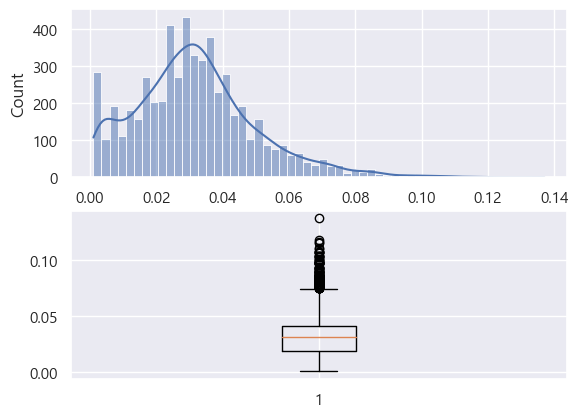

In [99]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['ozone'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['ozone'])

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [70]:
#변수의 자료형을 확인해보세요.
sbike['PM10'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [72]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['PM10'].isnull().sum()

102

4. 변수의 기초 통계량 확인

In [73]:
#변수의 기초 통계량을 확인해보세요
sbike['PM10'].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

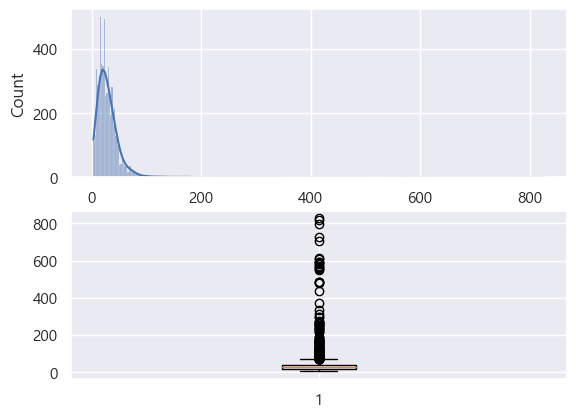

In [100]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['PM10'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['PM10'])

plt.show()

In [152]:
print(sbike.loc[sbike['PM10']>200]['PM10'].count())
print(sbike.loc[sbike['PM10']>100]['PM10'].count()) # 0.016
print(sbike.loc[sbike['PM10']>50]['PM10'].count())

44
93
544


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [75]:
#변수의 자료형을 확인해보세요.
sbike['PM2.5'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [76]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['PM2.5'].isnull().sum()

95

4. 변수의 기초 통계량 확인

In [77]:
#변수의 기초 통계량을 확인해보세요
sbike['PM2.5'].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

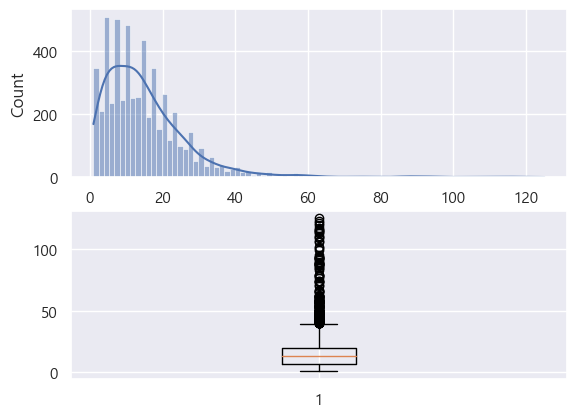

In [101]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['PM2.5'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['PM2.5'])

plt.show()

In [153]:
print(sbike.loc[sbike['PM2.5']>50]['PM2.5'].count()) # 0.018

105


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [80]:
#변수의 자료형을 확인해보세요.
sbike['count'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [81]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sbike['count'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [82]:
#변수의 기초 통계량을 확인해보세요
sbike['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

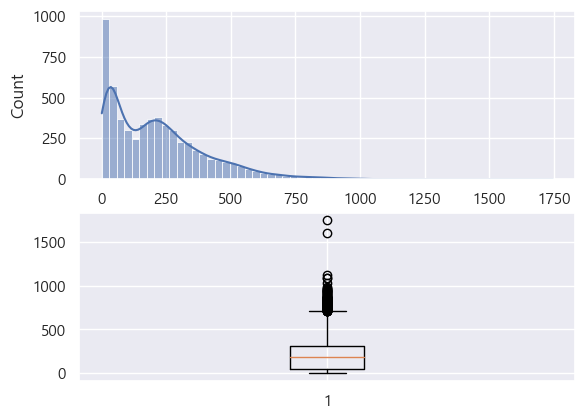

In [83]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(sbike['count'], kde=True)

plt.subplot(2,1,2)
plt.boxplot(x=sbike['count'])

plt.show()

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.  
자전거 대여량 수는 수치형이고 타켓이므로 이상치 판단을 하지 않는다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

<AxesSubplot:xlabel='precipitation', ylabel='count'>

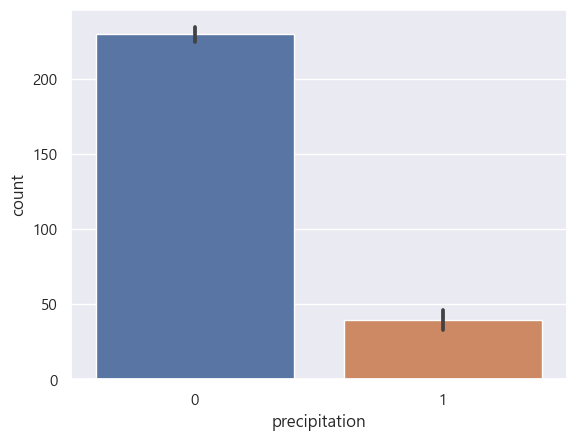

In [85]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x='precipitation', y='count', data=sbike)

In [86]:
rain = sbike.loc[sbike['precipitation']==1, 'count']
sunny = sbike.loc[sbike['precipitation']==0, 'count']
spst.ttest_ind(rain, sunny)

Ttest_indResult(statistic=-21.389614151911022, pvalue=8.86239184041254e-98)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

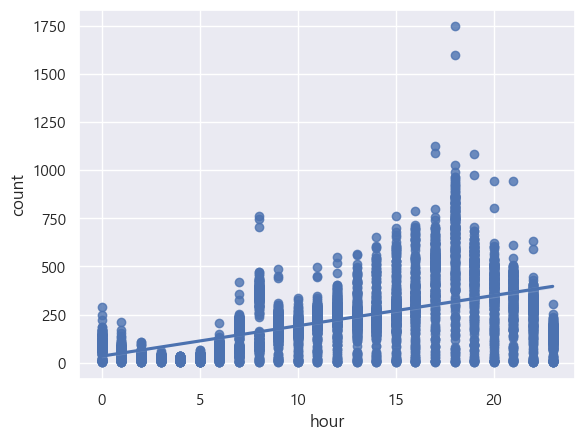

In [88]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x='hour', y='count', data=sbike)
plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

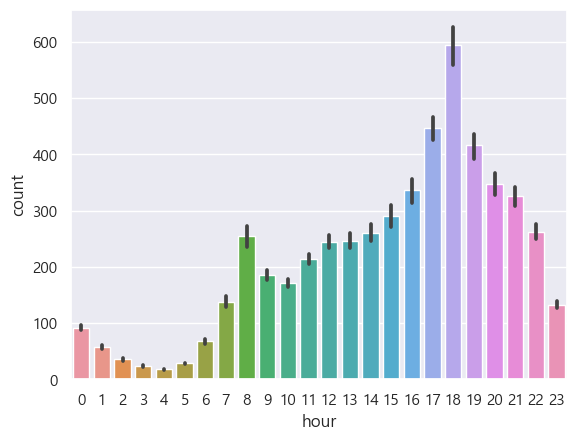

In [124]:
sns.barplot(x='hour', y='count', data=sbike)

In [128]:
h0 = sbike.loc[sbike['hour']==0, 'count']
h1 = sbike.loc[sbike['hour']==1, 'count']
h2 = sbike.loc[sbike['hour']==2, 'count']
h3 = sbike.loc[sbike['hour']==3, 'count']
h4 = sbike.loc[sbike['hour']==4, 'count']
h5 = sbike.loc[sbike['hour']==5, 'count']
h6 = sbike.loc[sbike['hour']==6, 'count']
h7 = sbike.loc[sbike['hour']==7, 'count']
h8 = sbike.loc[sbike['hour']==8, 'count']
h9 = sbike.loc[sbike['hour']==9, 'count']
h10 = sbike.loc[sbike['hour']==10, 'count']
h11 = sbike.loc[sbike['hour']==11, 'count']
h12 = sbike.loc[sbike['hour']==12, 'count']
h13 = sbike.loc[sbike['hour']==13, 'count']
h14 = sbike.loc[sbike['hour']==14, 'count']
h15 = sbike.loc[sbike['hour']==15, 'count']
h16 = sbike.loc[sbike['hour']==16, 'count']
h17 = sbike.loc[sbike['hour']==17, 'count']
h18 = sbike.loc[sbike['hour']==18, 'count']
h19 = sbike.loc[sbike['hour']==19, 'count']
h20 = sbike.loc[sbike['hour']==20, 'count']
h21 = sbike.loc[sbike['hour']==21, 'count']
h22 = sbike.loc[sbike['hour']==22, 'count']
h23 = sbike.loc[sbike['hour']==23, 'count']
spst.f_oneway(h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23)

F_onewayResult(statistic=396.53478836804635, pvalue=0.0)

In [89]:
spst.pearsonr(sbike['hour'], sbike['count'])

PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)

3. 온도 데이터와 따릉이 대여량간 분석

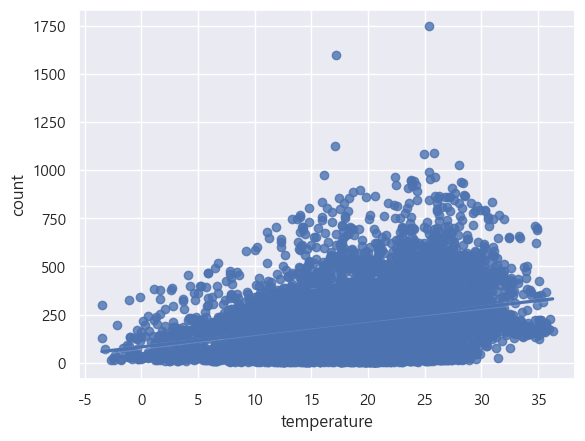

PearsonRResult(statistic=0.2771692363089791, pvalue=2.9405165551619465e-103)


In [90]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
def reg(var, target):
    sns.regplot(x=var, y=target, data=sbike)
    plt.show()
    
    print(spst.pearsonr(sbike[var], sbike[target]))
    
reg('temperature', 'count')

4. 풍속 데이터와 따릉이 대여량간 분석

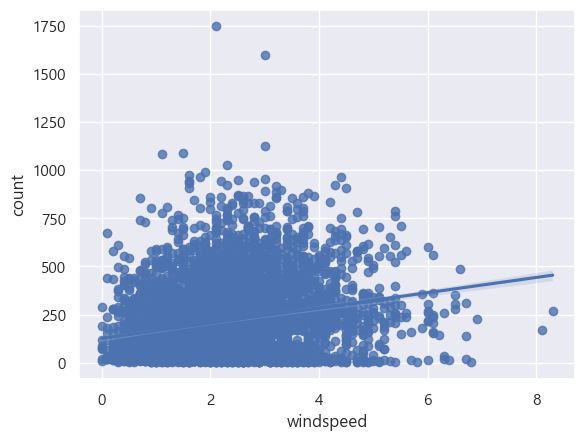

PearsonRResult(statistic=0.22372189900674888, pvalue=5.2433176782994606e-67)


In [92]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
reg('windspeed', 'count')

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

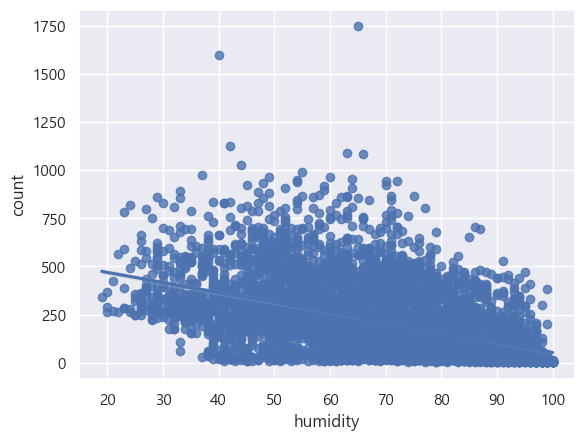

PearsonRResult(statistic=-0.48074217482491177, pvalue=0.0)


In [102]:
reg('humidity', 'count')

6. 시정 데이터와 따릉이 대여량간 분석

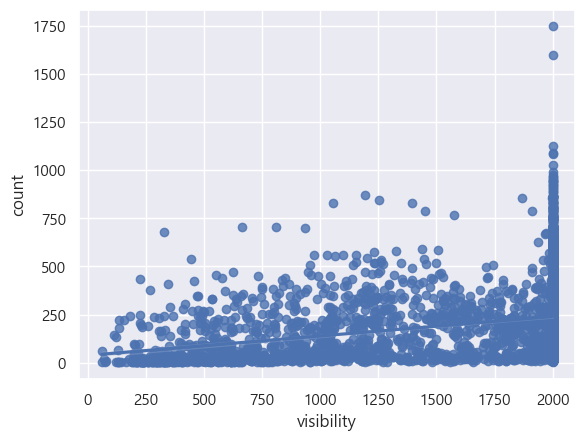

PearsonRResult(statistic=0.26207314766928064, pvalue=1.0691328205534822e-89)


In [103]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
reg('visibility', 'count')

7. 오존 데이터와 따릉이 대여량간 분석

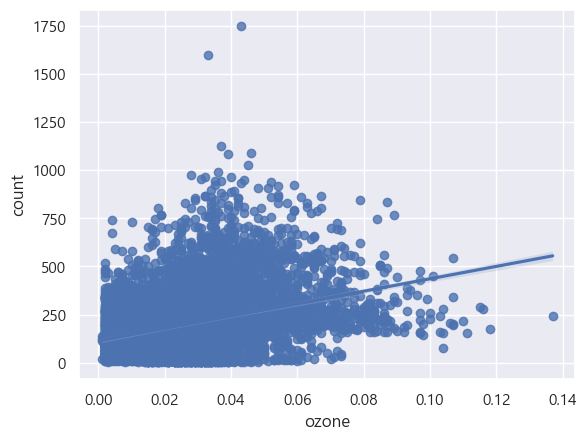

PearsonRResult(statistic=0.3143357943088431, pvalue=3.025523189274068e-130)


In [104]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
reg('ozone', 'count')

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

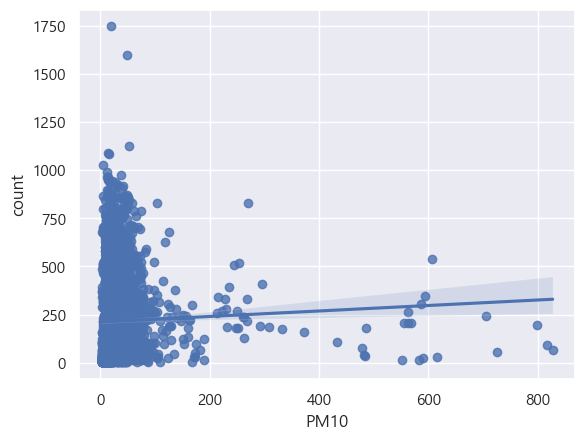

PearsonRResult(statistic=0.03262773163856617, pvalue=0.01401178505403581)


In [105]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
reg('PM10', 'count')

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

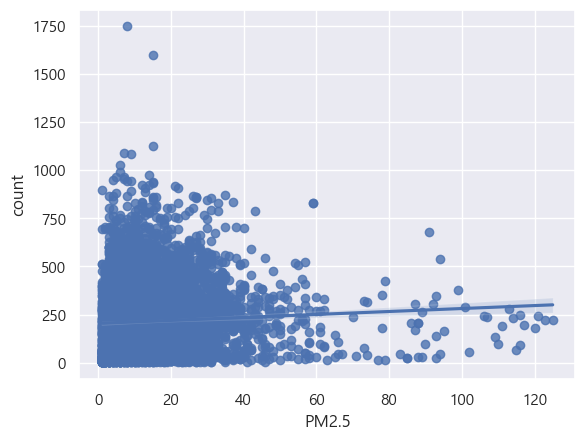

PearsonRResult(statistic=0.0529237283818275, pvalue=6.690256718116022e-05)


In [106]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
reg('PM2.5', 'count')

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강수여부, 시간대별

#### <font color='green'>2. 약한 관계의 변수</font>


온도별, 풍속, 습도, 시정, 오존

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


미세먼지, 초미세먼지

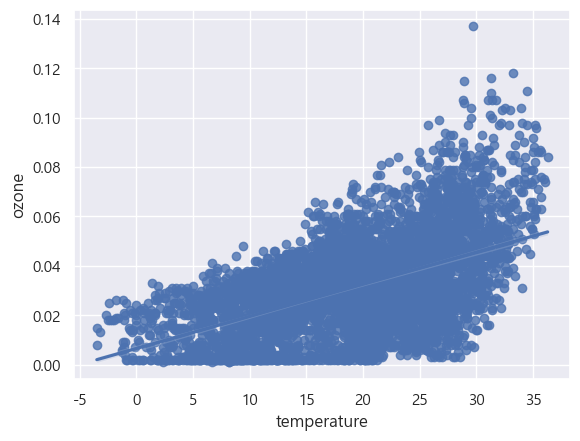

PearsonRResult(statistic=0.5313822686169389, pvalue=0.0)


In [108]:
# 오존은 기온 25도 이상, 상대습도 75퍼 이하, 풍속 4m이하의 맑고 건조한 날씨에 늘어난다.
reg('temperature', 'ozone')

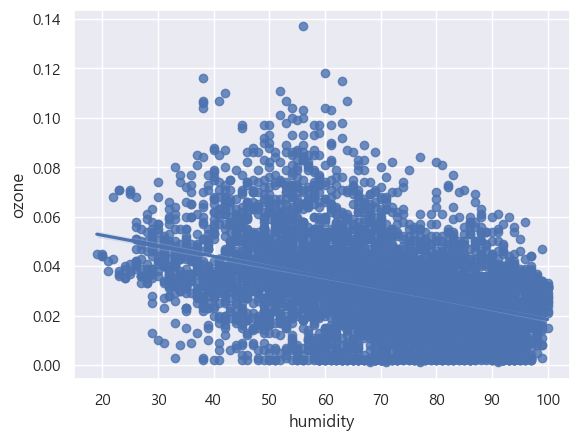

PearsonRResult(statistic=-0.4034334026876506, pvalue=5.998504943533354e-221)


In [112]:
reg('humidity', 'ozone')

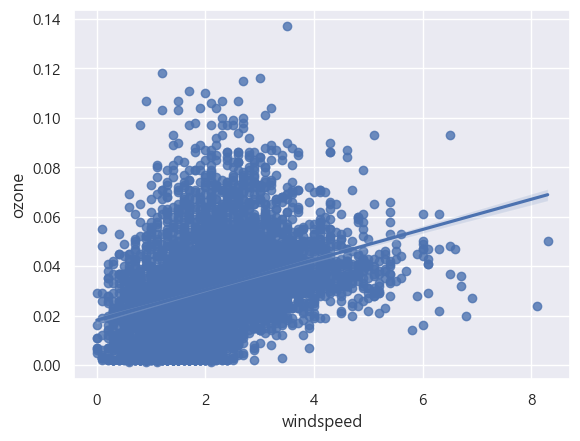

PearsonRResult(statistic=0.35064882841655975, pvalue=1.0100630486998459e-163)


In [111]:
reg('windspeed', 'ozone')

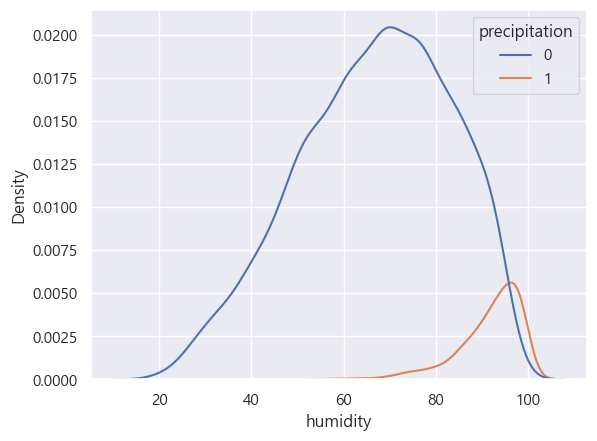

In [114]:
# 강우와 습도의 관계 파악
sns.kdeplot(x='humidity', data=sbike, hue='precipitation')
plt.show()

In [116]:
sbike['snow'] = np.where((sbike['precipitation']==1)&(sbike['temperature']<0), 1, 0)
sbike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,snow
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,0
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,0
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,0
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,0
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,0


In [122]:
# 눈 오는 날은 없다
sbike.loc[sbike['snow']==0]['snow'].count()

5670

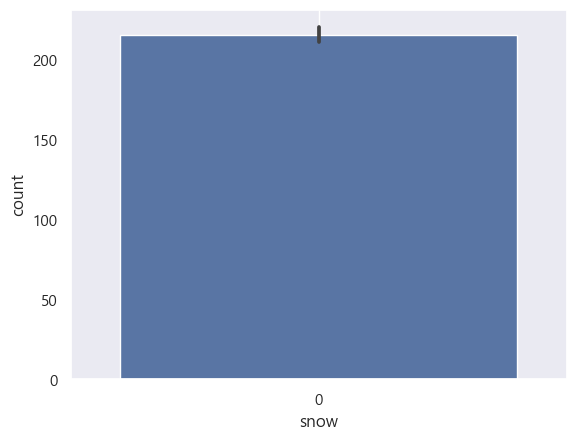

In [117]:
sns.barplot(x='snow', y='count', data=sbike)
plt.grid()
plt.show()

<AxesSubplot:xlabel='요일', ylabel='count'>

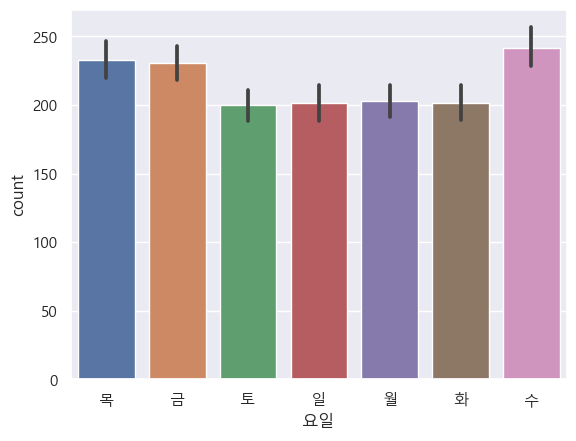

In [135]:
sns.barplot(x='요일', y='count', data=sbike)

<AxesSubplot:xlabel='요일', ylabel='temperature'>

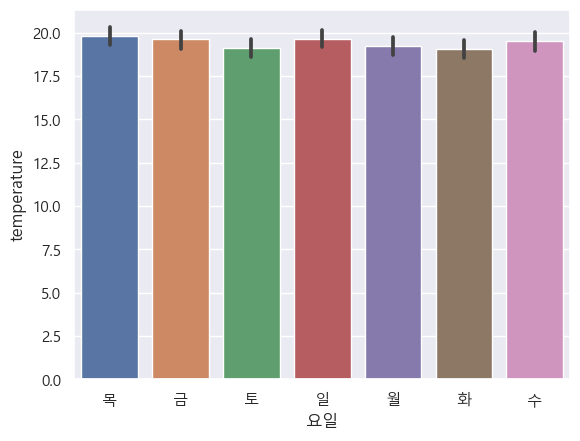

In [142]:
sns.barplot(x='요일', y='temperature', data=sbike)

In [137]:
mon = sbike.loc[sbike.요일 == '월', 'count']
tue = sbike.loc[sbike.요일 == '화', 'count']
web = sbike.loc[sbike.요일 == '수', 'count']
thu = sbike.loc[sbike.요일 == '목', 'count']
fri = sbike.loc[sbike.요일 == '금', 'count']
sat = sbike.loc[sbike.요일 == '토', 'count']
sun = sbike.loc[sbike.요일 == '일', 'count']
spst.f_oneway(mon, tue, web, thu, fri, sat, sun)

F_onewayResult(statistic=7.911152054777845, pvalue=1.640945510912235e-08)

<AxesSubplot:xlabel='month', ylabel='count'>

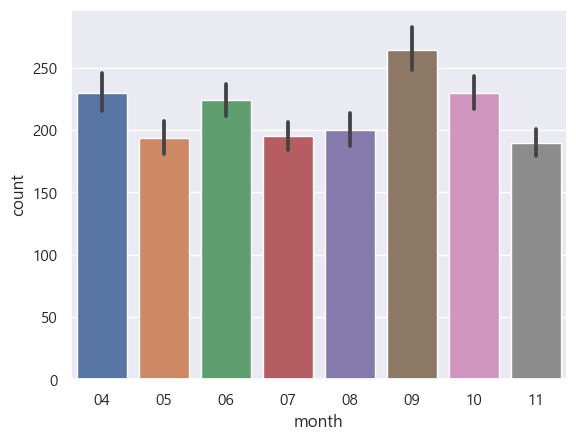

In [139]:
sns.barplot(x='month', y='count', data=sbike)

<AxesSubplot:xlabel='month', ylabel='temperature'>

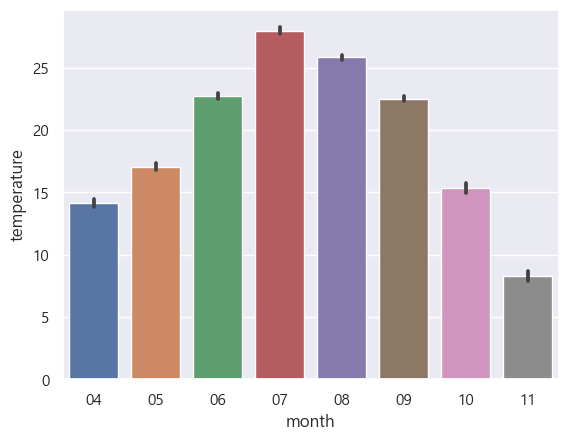

In [140]:
sns.barplot(x='month', y='temperature', data=sbike)

In [149]:
sbike.groupby(by='month')['temperature'].mean()

Series([], Name: temperature, dtype: float64)

### [Step6] Insight 도출

강한 관계는 강수여부와 시간으로 나왔으며  
중간 관계는 온도, 풍속, 습도, 오존, 시정이며  
약한 관계는 미세먼지와 초미세먼지로 나왔다.  

사람들이 오존을 체크하며 자전거를 탄다는 것에 궁금하고,  
오존 또한 대여량과 중간 정도의 연관성을 띄어 오존수치가 어떻게 정해지는지 조사 했으며  
오존은 온도가 높을수록, 풍속이 높을수록, 습도가 낮을 수록 수치가 높게 나온다는 것을 알 수 있었으며  
특히 온도가 높은 상관계수가 나오고, 풍속과 습도가 중간 상관계수가 나왔다.  
  
요일별로 대여량을 조사했을 때는 수,목,금요일에 대여량이 다른 요일보다 높았으며  
월별로 분석했을 때는 9월이 대여량이 가장 높았습니다.  
월별 온도는 7월이 가장 높고 11월이 가장 낮았지만,  
이러한 요인이 월별 대여량에 영향이 미미하게 보여 다른 외부적 요인이 있다고 생각됩니다.